In [2]:
#manggil sql
import pymysql
import pandas as pd

host = '127.0.0.1'
port = "3306"
user = 'root'
password = ''
database = 'news'

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

def run(sql):
    df = pd.read_sql_query(sql,conn)
    return df

In [3]:
#manggil table
df_result = run ("SELECT*FROM gdelt_content")
print (df_result)

      SQLDATE                                              title  \
0    20170104           Kiwi beauty wears the crown - Metro News   
1    20170110                                               None   
2    20170111                                               None   
3    20170113                                               None   
4    20170114                                               None   
5    20170118                                          Mercusuar   
6    20170119  Boyong 30 Sellers, Kemenpar Gelar Indonesia To...   
7    20170119  Fokus ke Selling, Kemenpar Bawa 40 Industri di...   
8    20170121  Get in early before the tourism dollar turns P...   
9    20170122                   Billionaire Official Online Shop   
10   20170125     Imlek lanterns enliven Surakarta river tourism   
11   20170125                                                      
12   20170125  Indonesia gains 242 billion rupiah at Spanish ...   
13   20170130  Ministry's new digital platform o

In [4]:
#for export sql to csv
df_result.to_csv('dftocsv_news_tourism.csv', index=False)

In [5]:
#manggil dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reviews = pd.read_csv("dftocsv_news_tourism.csv", index_col=0)
reviews.head(3)

,title,Actor1CountryCode,GoldsteinScale,AvgTone,URL,content
SQLDATE,,,,,,
20170104,Kiwi beauty wears the crown - Metro News,IDN,3.4,8.139535,http://www.thestar.com.my/metro/community/2017...,WHAT a spectacular end to the year it was for ...
20170110,NaN,IDN,4.0,2.290076,http://malaysiandigest.com/world/652329-indone...,NaN
20170111,NaN,IDN,4.0,2.290076,http://www.malaysiandigest.com/world/652329-in...,NaN


In [58]:
#GoldsteinScale 
#Each event code has a certain impact: positive or negative. The GoldsteinScale attaches an importance to the event.
#Here is a table to explain what the Goldstein scale does:

reviews[['GoldsteinScale', 'content']]
reviews [reviews.content.notnull()]


,title,Actor1CountryCode,GoldsteinScale,AvgTone,URL,content
SQLDATE,,,,,,
20170104,Kiwi beauty wears the crown - Metro News,IDN,3.4,8.139535,http://www.thestar.com.my/metro/community/2017...,WHAT a spectacular end to the year it was for ...
20170119,"Boyong 30 Sellers, Kemenpar Gelar Indonesia To...",IDN,4.0,3.155340,http://thepresidentpostindonesia.com/2017/01/1...,Write CSS OR LESS and hit save. CTRL + SPACE f...
20170119,"Fokus ke Selling, Kemenpar Bawa 40 Industri di...",IDN,2.8,3.333333,http://thepresidentpostindonesia.com/2017/01/1...,Write CSS OR LESS and hit save. CTRL + SPACE f...
20170121,Get in early before the tourism dollar turns P...,IDN,2.8,-0.522193,http://asopa.typepad.com/asopa_people/2017/01/...,"To be honest, the weather is the least of our ..."
20170122,Billionaire Official Online Shop,IDN,0.0,0.912409,http://www.billionaire.com/conscious-entrepren...,This website uses profiling cookies to offer y...
20170125,Imlek lanterns enliven Surakarta river tourism,IDN,1.9,3.338898,http://www.thejakartapost.com/travel/2017/01/2...,The Pepe River in the Pasar Gede area in Surak...
20170125,Indonesia gains 242 billion rupiah at Spanish ...,IDN,2.8,3.908903,http://www.antaranews.com/en/news/109108/indon...,Indonesia gains 242 billion rupiah at Spanish ...
20170130,Ministry's new digital platform offers all-in-...,IDN,6.0,1.893939,http://www.thejakartapost.com/travel/2017/01/3...,The State-Owned Enterprises (SOEs) Ministry ha...
20170131,Southeast Asia’s Tourism Campaign Is a Misplac...,IDN,4.0,0.394867,https://skift.com/2017/01/31/southeast-asias-t...,\r\n\r\nEditor’s Note: Skift launched a new se...


It becomes clear that negative numbers like -10. correspond to "bad" events - like "Volcanic Ash Forces Lombok Airport to Suspend" and positive numbers correspond to "positive" events like "Indonesian tourism industries support visa-free".

In [59]:
#Mean Median Modus of GoldsteinScale
GoldsteinScale = reviews['GoldsteinScale']

mean=GoldsteinScale.mean()
median=GoldsteinScale.median()
mode=GoldsteinScale.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  2.2972477064220174 
Median:  2.8 
Mode:  2.8


Mostly it is  "positive" events for tourism news

In [60]:
#Goldstein statistic 
reviews.describe()

,GoldsteinScale,AvgTone
count,654.000000,654.000000
mean,2.297248,2.391026
std,2.687580,2.506726
min,-10.000000,-7.518797
25%,1.225000,1.044835
50%,2.800000,2.480804
75%,3.400000,3.912008
max,10.000000,11.111111


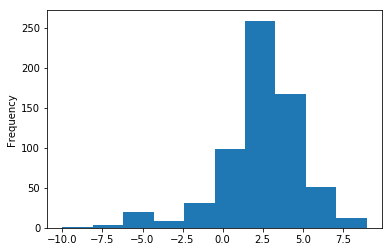

In [8]:
#GoldsteinScale plot
reviews[reviews['GoldsteinScale'] < 10]['GoldsteinScale'].plot.hist()

C:\Users\susi indrawati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D352F28>,
      dtype=object)

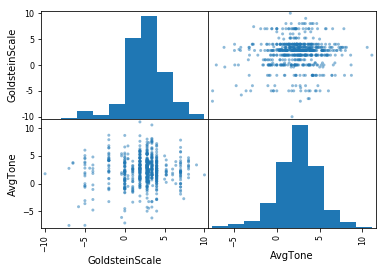

In [61]:

from pandas.tools import plotting
plotting.scatter_matrix(reviews[['GoldsteinScale', 'AvgTone']])

 
The plot between GoldsteinScale and Average tone of the articles

In [14]:
from scipy import stats

In [18]:
#t-Test between GoldsteinScale and Average tone of the articles
stats.ttest_1samp(reviews['GoldsteinScale'] - reviews['AvgTone'],0) 

Ttest_1sampResult(statistic=-0.6826404551912851, pvalue=0.49507615490618473)

terdapat hubungan negatif antara GoldsteinScale and Average tone of the articles

In [16]:
import matplotlib.pyplot as plt

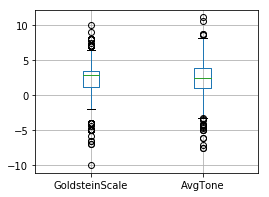

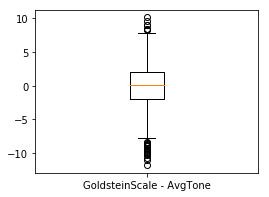

In [17]:
# Box plot of GoldsteinScale and AvgTone (different measures)
plt.figure(figsize=(4, 3))
reviews.boxplot(column=['GoldsteinScale', 'AvgTone'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(reviews['GoldsteinScale'] - reviews['AvgTone'])
plt.xticks((1, ), ('GoldsteinScale - AvgTone', ))

plt.show()